## **OpenAI Gym, PyBullet and PyBulletGym Installation**
[Click here to see Gym documentaion](https://gym.openai.com/docs/)

[Click here to see PyBullet documentaion](https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA)

[Click here to see PyBulletGym page](https://github.com/benelot/pybullet-gym)



**Before we start, first update the apt-get tool in the given machine.**

In [0]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [88.1 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [839 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu

Most of the requirements of python packages are already fulfilled on Colab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.

In [0]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 0s (3,879 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 784 kB o

For rendering environment, you can use pyvirtualdisplay. So fulfill that

In [0]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 


**Newly added step: installing Atari!**

In [0]:
!pip install gym[atari]

In [0]:
!pip install pybullet==2.5.9

     |████████████████████████████████| 82.7MB 112kB/s 
  Created wheel for pybullet: filename=pybullet-2.5.9-cp36-cp36m-linux_x86_64.whl size=94374516 sha256=3e8f5c846e5d0aff5dad65f11c5e25e7069f9df50c8c358e578d8fabc8437e20
  Stored in directory: /root/.cache/pip/wheels/e4/be/17/68e1fc91e1594bbc35330ae240f2c74dcce4219786729e034f
Successfully built pybullet


In [0]:
!git clone https://github.com/benelot/pybullet-gym.git

Cloning into 'pybullet-gym'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 735 (delta 3), reused 6 (delta 1), pack-reused 720
Receiving objects: 100% (735/735), 19.30 MiB | 14.87 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [0]:
cd /content/pybullet-gym/

/content/pybullet-gym


In [0]:
!pip install -e .

Obtaining file:///content/pybullet-gym
  Running setup.py develop for pybulletgym


Import everything.

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only
import pybulletgym  # register PyBullet enviroments with open ai gym
import pybullet
import pybullet_data

import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

# Colab comes with PyTorch
import argparse, math, os
import numpy as np
import gym
from gym import wrappers

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.utils as utils
import torchvision.transforms as T
from torch.autograd import Variable

To activate virtual display, we need to run a script once for training an agent, as follows:

In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

The following code creates a virtual display to draw game images on. If you are running locally, just ignore it.

In [0]:
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('/content/video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, '/content/video', force=True)
  return env

# **Test three environments that we are going to use.**
## Breakout

Breakout-ram-v0: belongs to  Atari, with discrete action space.

See what it looks like: https://gym.openai.com/envs/Breakout-ram-v0/

In [0]:
env = gym.make("Breakout-ram-v0")
print("env.action_space: ", env.action_space)

n_episode = 20    # number of episodes
max_steps = 1000   # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

env.action_space:  Discrete(4)
Episode finished after 168 timesteps
Episode finished after 238 timesteps
Episode finished after 172 timesteps
Episode finished after 287 timesteps
Episode finished after 378 timesteps
Episode finished after 241 timesteps
Episode finished after 169 timesteps
Episode finished after 168 timesteps
Episode finished after 250 timesteps
Episode finished after 190 timesteps
Episode finished after 235 timesteps
Episode finished after 333 timesteps
Episode finished after 292 timesteps
Episode finished after 388 timesteps
Episode finished after 184 timesteps
Episode finished after 228 timesteps
Episode finished after 289 timesteps
Episode finished after 228 timesteps
Episode finished after 178 timesteps
Episode finished after 225 timesteps


array([ 63,  63,  63,  63,  63,  63, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 192, 192, 192, 192, 192, 192, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240,   0,   0,
       255,   0,   0, 240,   0,   5,   0,   0,   6,   0,  70, 182, 134,
       198,  22,  38,  54,  70,  88,   6, 146,   0,   8,   0,   0,   0,
         0,   0,   0, 241,   0, 242,   0, 242,  25, 241,   5, 242,   0,
         0, 255,   0, 228,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   8,   0, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   5,   0,   0, 186, 214, 117, 246, 219, 242], dtype=uint8)

### Inverted Pendulum

InvertedPendulumMuJoCoEnv-v0: belongs to MuJoCo, with continuous action space. **Remember to discretize it when you go with an action.**

See what it looks like: https://gym.openai.com/envs/InvertedPendulum-v2/

In [0]:
#define the simulated environment we are going to use
env = gym.make("InvertedPendulumMuJoCoEnv-v0")
#check out the pacman action space!
print("env.action_space: ", env.action_space)

n_episode = 20    # number of episodes
max_steps = 1000   # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        #if done[0] and done[1]:
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

current_dir=/usr/local/lib/python3.6/dist-packages/pybullet_envs/bullet
env.action_space:  Box(1,)
options= 
Episode finished after 31 timesteps
Episode finished after 29 timesteps
Episode finished after 49 timesteps
Episode finished after 16 timesteps
Episode finished after 22 timesteps
Episode finished after 21 timesteps
Episode finished after 33 timesteps
Episode finished after 47 timesteps
Episode finished after 21 timesteps
Episode finished after 24 timesteps
Episode finished after 22 timesteps
Episode finished after 27 timesteps
Episode finished after 22 timesteps
Episode finished after 26 timesteps
Episode finished after 27 timesteps
Episode finished after 31 timesteps
Episode finished after 60 timesteps
Episode finished after 27 timesteps
Episode finished after 32 timesteps
Episode finished after 42 timesteps


array([[ 0.        , -0.03520468],
       [ 0.        ,  0.        ]])

### Half Cheetah

HalfCheetah-v2: belongs to MuJoCo, with continuous action space.  **Remember to discretize it when you go with an action.**

See what it looks like: https://gym.openai.com/envs/HalfCheetah-v2/

In [0]:
env = gym.make("HalfCheetahMuJoCoEnv-v0")
print("env.action_space: ", env.action_space)

n_episode = 20      # number of episodes
max_steps = 10001    # maximum steps for each episode

# Iterate through all episodes
for i_episode in range(n_episode):
    observation = env.reset()

    # Iterate through all steps
    for t in range(max_steps):
        env.render()
        s = observation
        a = env.action_space.sample() # sample an action

        # One step
        observation, r, done, info = env.step(a) # s_prime: next observation, r: immediate reward, done: terminal state indicator
        s_prime = observation

        # Ends this episode if reaching a terminal state
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

# should return a state vector if everything worked
env.reset()

WalkerBase::__init__
env.action_space:  Box(6,)
options= 
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps
Episode finished after 1000 timesteps


array([ 0.07139357, -0.07796321, -0.03489419,  0.06424128, -0.09001315,
       -0.01749527, -0.00727994, -0.08209375,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

# Implementation - Assignment 2

# Reinforce Algorithm

In [0]:
#  Normalization for contunious curve
'''
In the below function i.e. def getNormalCurveValues, for a continous functions or curves
having mean, variable, normal values are being calculated
'''

def getNormalCurveValues(func_x, mean_val, variance_val):
    normal_val = ((-1*(Variable(func_x)-mean_val).pow(2)/(2*variance_val)).exp())/ \
                  ((2*variance_val*(Variable(torch.FloatTensor([math.pi])).cuda()).expand_as(variance_val)).sqrt())
    return normal_val

In [0]:
# Class for Policy 
'''
Below is the class and its function which is used to create policy for the experiment based on the neural network
'''

class Policy(nn.Module): #Definition for class Policy

    # Initialization function alongwith Neural Network (inputs: observation and action space of the environment)
    def __init__(self, observation_space, action_space): #Definition for init function
        super(Policy, self).__init__()
        self.observation_space = observation_space
        self.action_space = action_space

        input_size = observation_space
        output_size = action_space.shape[0]
        #print("Policy init:",input_size,output_size)
        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, output_size)
        self.linear4_ = nn.Linear(128, output_size)

    def forward(self, inputs): #Definition for forward function
        x = inputs
        x = F.relu(self.linear1(x))
        mean_val = self.linear4(x)
        variance_val = self.linear4_(x)
        return mean_val, variance_val


In [0]:
# Class for ReinforceAlgorithm 
'''
Below is the main class and its function which is used to implement Reinforce algorithm.
In this class, initially the above defined Policy is used for init and training through neural network and further
Based on the state obtained from the model, normalized action value is calculated for these continous environment.
Then I used the earlier defined getNormalCurveVaules function to calculate the probability and entropy.
Now based on these probability values the policy parameters are being updated in the function
'''

class ReinforceAlogrithm: #Definition for class ReinforceAlgorithm
  
  # Initialization function 
  def __init__(self, observation_space, action_space):
    self.observation_space=observation_space
    self.action_space = action_space
    self.model = Policy(observation_space, action_space) # Call for Policy class for initilization and model training
    self.model = self.model.cuda()
    self.optimizer = optim.Adam(self.model.parameters(), lr=1e-3) #Using Adam optimizer
    self.model.train()

  # Function to generate action for a particular state
  def GenerateAction(self, state): #Definition of GenerateAction function
    present_state = state.view(state.size(0), -1)
    mean_val, variance_val = self.model(Variable(present_state).cuda())
    variance_val = F.softplus(variance_val)
    epsilon = torch.randn(mean_val.size())
    action_generated = (mean_val + variance_val.sqrt()*Variable(epsilon).cuda()).data

    probability_val = getNormalCurveValues(action_generated, mean_val, variance_val) #Calculating Probability value
    entropy_val = -0.5*((variance_val+2*(Variable(torch.FloatTensor([math.pi])).cuda()).expand_as(variance_val)).log()+1)#Calculating entropy value
    log_probability = probability_val.log()
    return action_generated, log_probability, entropy_val

  #Function to update policy parameters
  def PolicyParamsUpdate(self, reward_values, probability_values, entropy_values, gamma):
    reward_update = torch.zeros(1, 1)
    loss = 0
    for i in reversed(range(len(reward_values))):
        reward_update = gamma * reward_update + reward_values[i]
        loss = loss - (probability_values[i]*(Variable(reward_update).expand_as(probability_values[i])).cuda()).sum() \
                    - (0.0001*entropy_values[i].cuda()).sum()
    loss = loss / len(reward_values)
		
    self.optimizer.zero_grad()
    loss.backward()
    utils.clip_grad_norm(self.model.parameters(), 40)
    self.optimizer.step()


In [0]:
def ImplementReinforce(env, episodes, steps, gamma):
  env=gym.make(env)
  seed=123
  torch.manual_seed(seed)
  np.random.seed(seed)
  agent = ReinforceAlogrithm(env.observation_space.shape[0], env.action_space)
  total_reward=[]

  for iter_ in range(episodes):

    state = torch.Tensor([env.reset()]) #Present state for the environment
    entropies = []
    probabilities = []
    rewards = []

    for t in range(steps):
        #Generating action based on the present state and also calculating the 
        #probability and entropy values for the respective generated action
        action, probability, entropy = agent.GenerateAction(state) 
        action = action.cpu()

        next_state, reward, done, _ = env.step(action.numpy()[0]) #Calculating next step and reward value

        #Adding values of entropy, probability and rewards
        entropies.append(entropy)
        probabilities.append(probability)
        rewards.append(reward)
        state = torch.Tensor([next_state])

        if done:
            break

    #Updating policy parameters
    agent.PolicyParamsUpdate(rewards, probabilities, entropies, gamma)

    print("Episode: {}, reward: {}".format(iter_, np.sum(rewards)))
    total_reward.append(np.sum(rewards)) #Calculating episodic rewards
  env.close()
  return total_reward


In [0]:
def plot(total_rewards):
  window = 10
  smoothed_rewards = [np.mean(total_rewards[i-window:i+1]) if i > window 
                    else np.mean(total_rewards[:i+1]) for i in range(len(total_rewards))]

  plt.figure(figsize=(12,8))
  plt.plot(total_rewards)
  plt.plot(smoothed_rewards)
  plt.ylabel('Total Rewards')
  plt.xlabel('Episodes')
  plt.show()


In [0]:
#Declaration of different environments
env1 = "InvertedPendulumMuJoCoEnv-v0"
env2 = "HalfCheetahMuJoCoEnv-v0"
episodes = 2000
steps = 100
gamma = 0.9

options= 
Episode: 0, reward: 48.0
Episode: 1, reward: 36.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode: 2, reward: 52.0
Episode: 3, reward: 24.0
Episode: 4, reward: 29.0
Episode: 5, reward: 43.0
Episode: 6, reward: 24.0
Episode: 7, reward: 67.0
Episode: 8, reward: 30.0
Episode: 9, reward: 23.0
Episode: 10, reward: 34.0
Episode: 11, reward: 47.0
Episode: 12, reward: 22.0
Episode: 13, reward: 83.0
Episode: 14, reward: 71.0
Episode: 15, reward: 51.0
Episode: 16, reward: 46.0
Episode: 17, reward: 53.0
Episode: 18, reward: 92.0
Episode: 19, reward: 39.0
Episode: 20, reward: 22.0
Episode: 21, reward: 70.0
Episode: 22, reward: 24.0
Episode: 23, reward: 36.0
Episode: 24, reward: 21.0
Episode: 25, reward: 32.0
Episode: 26, reward: 17.0
Episode: 27, reward: 29.0
Episode: 28, reward: 15.0
Episode: 29, reward: 23.0
Episode: 30, reward: 16.0
Episode: 31, reward: 26.0
Episode: 32, reward: 36.0
Episode: 33, reward: 15.0
Episode: 34, reward: 20.0
Episode: 35, reward: 14.0
Episode: 36, reward: 22.0
Episode: 37, reward: 19.0
Episode: 38, reward: 27.0
Episode: 39, reward: 20.0
Episode: 40, reward:

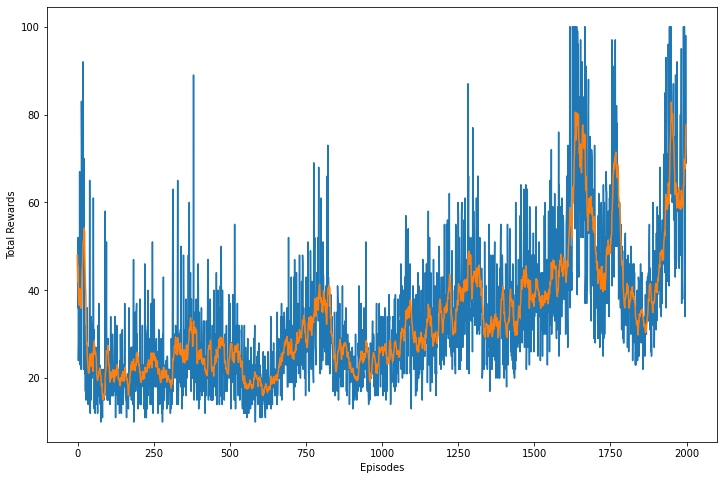

In [0]:
#Running Reinforce Algorithm for Environment 1: InvertedPendulumMuJoCoEnv-v0

total_rewards_inverted_pendulum_reinforce=ImplementReinforce(env1,episodes,steps,gamma)
plot(total_rewards_inverted_pendulum_reinforce)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode: 0, reward: -417.2294607078391
Episode: 1, reward: -211.00922950634677
Episode: 2, reward: -256.43913898872484
Episode: 3, reward: -242.1229548278703
Episode: 4, reward: -313.87127798166784
Episode: 5, reward: -304.46387287120103
Episode: 6, reward: -359.69671719394466
Episode: 7, reward: -426.0632810546376
Episode: 8, reward: -345.9413772261452
Episode: 9, reward: -398.17303973652105
Episode: 10, reward: -294.04820646153485
Episode: 11, reward: -330.53062802056866
Episode: 12, reward: -364.96445682448336
Episode: 13, reward: -299.7395771461508
Episode: 14, reward: -332.38419684758327
Episode: 15, reward: -286.75672624828417
Episode: 16, reward: -392.230307791844
Episode: 17, reward: -259.5280922699832
Episode: 18, reward: -280.14988401123054
Episode: 19, reward: -285.74361250229407
Episode: 20, reward: -345.64292308097686
Episode: 21, reward: -319.539413264439
Episode: 22, reward: -339.60252657024523
Episode: 23, reward: -390.2227624514231
Episode: 24, reward: -412.72785369666

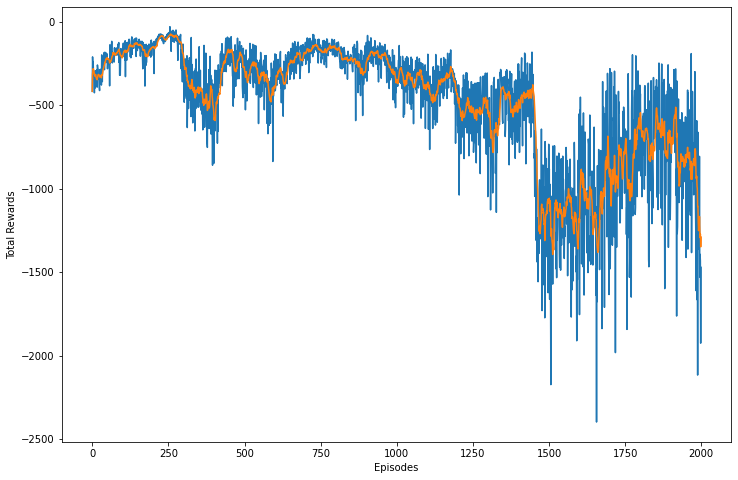

In [0]:
#Running Reinforce Algorithm for Environment 2: HalfCheetahMuJoCoEnv-v0

total_rewards_halfcheetah_reinforce=ImplementReinforce(env2,episodes,steps,gamma)
plot(total_rewards_halfcheetah_reinforce)

#Actor-Critic Algorithm

In [0]:
#Class for creating Actor model

'''
Below class is used for the initilization of the Neural network for the Actor model and then
normalization the curve (output of the model)
'''
class ActorModel(nn.Module):
    
    # Initiizing network
    def __init__(self, observation_space_size, action_space_size): #init function definition
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(observation_space_size, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, action_space_size),
            nn.Tanh()
        )
        self.standard = torch.nn.Parameter(torch.Tensor([math.log(0.5)] * action_space_size))
    # Forward Propagation
    def forward(self, X):
        mean_val = self.model(X)
        normal = torch.distributions.Normal(mean_val, torch.exp(torch.clamp(self.standard, 1e-3, 50))) #Normalizing based on actions

        return normal

In [0]:
#Class for creating Critic model

'''
Below class is used for the initilization of the Neural network for the Critic model and its model
'''
class CriticModel(nn.Module):
    # Initiizing network
    def __init__(self, observation_space_size): #init function definition
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(observation_space_size, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    # Forward Propagation
    def forward(self, X):
        return self.model(X)


In [0]:
#Class for Actor-Critic Algorithm 

'''
Below class is the implementation of Actor-Critic Algorithm and functions to getnerate actions,
calculate probability, loss and update parameters of the policy
'''
# Actor-Critic Class
class ActorCriticBatch():
  # Initilization function
  def __init__(self, env): #init function definition
    self.env = env
    self.input_size = env.observation_space.shape[0]
    self.output_size = env.action_space.shape[0]
    self.actor = ActorModel(self.input_size, self.output_size)
    self.critic = CriticModel(self.input_size)
    # Optimizers for actor and critic
    self.adam_actor = torch.optim.Adam(self.actor.parameters(), lr=1e-3) 
    self.adam_critic = torch.optim.Adam(self.critic.parameters(), lr=1e-3)

  # Get action given observation state
  def GenerateAction(self, state):
    dists = self.actor(to_tensor(state))
    action = dists.sample()
    with torch.no_grad():
      action = dists.loc + dists.scale * to_tensor(np.random.normal(size=action.shape))
      actions_clamped = torch.clamp(action, self.env.action_space.low.min(), self.env.action_space.high.max())

        # For getting log of probability value. Used for loss calculation purpose.
    return actions_clamped.detach().data.numpy(), dists.log_prob(action)

In [0]:
#Implementation of Actor Critic Agorithm
'''
In this function actor critic algorithm has been implemented. 
This function includes generation of action based on present state and then
using that action to obtain next state and rewards.
These are further used to calculate probabilty and loss function.
Further the parameters for Policy including Actor and Critic are updated
'''

def ImplementActorCritic(env, episodes, steps, gamma): #Definition of ImplementActorCritic function
  env=gym.make(env)
  actor_critic = ActorCriticBatch(env)
  # Optimizers for actor and critic
  actor_critic.adam_actor = torch.optim.Adam(actor_critic.actor.parameters(), lr=1e-3) 
  actor_critic.adam_critic = torch.optim.Adam(actor_critic.critic.parameters(), lr=1e-3)
  
  #Store previous values
  store_val = []
  total_reward = []

  for iter_ in range(episodes):
    done = False 
    rewards = 0
    state = env.reset().reshape(-1)
    steps = 0
    
    #Within each episode
    while not done:
      #Generating action
      action, log_prob_val = actor_critic.GenerateAction(state)
                
      # Using generated action to get next state and rewards
      next_state, reward, done, info = actor_critic.env.step(action)
      next_state = next_state.reshape(-1)

      store_val.append((log_prob_val, actor_critic.critic(to_tensor(state)), reward, done))
      
      rewards += reward
      state = next_state
      steps += 1

      if done or (steps % max_steps == 0):
        next_value = actor_critic.critic(to_tensor(next_state)).detach().data.numpy()

        values, probability_values = [], []
        td_targets = np.zeros((len(store_val), 1))

        #Calculating target values backward
        for i, (probability, value, reward, done) in enumerate(store_val[::-1]):
          probability_values.insert(0, probability)
          values.insert(0, value)

          next_value = reward + gamma * next_value * (1.0 - done)
          td_targets[len(store_val) - 1 - i] = next_value

        values = torch.stack(values)
        
        advantage_obtained = torch.Tensor(td_targets) - values

        #Updating Policy and its parameters for both Actor and Critic
        critic_loss = advantage_obtained.pow(2).mean()
        actor_critic.adam_critic.zero_grad()
        critic_loss.backward()
        actor_critic.adam_critic.step()
      
        actor_loss = (-torch.stack(probability_values) * advantage_obtained.detach()).mean()
        actor_critic.adam_actor.zero_grad()
        actor_loss.backward()
        actor_critic.adam_actor.step()
        
        store_val.clear()

    print("Episode: {}, reward: {}".format(iter_, np.sum(rewards)))
    total_reward.append(rewards) #Append reward for the episode
  actor_critic.actor.eval()
  actor_critic.critic.eval()
  return total_reward

In [0]:
#Declaration of different environments
env1 = "InvertedPendulumMuJoCoEnv-v0"
env2 = "HalfCheetahMuJoCoEnv-v0"
episodes = 2000
steps = 100
batch_size = 32
gamma = 0.9

options= 
Episode: 0, reward: 25.0
Episode: 1, reward: 17.0
Episode: 2, reward: 29.0
Episode: 3, reward: 16.0
Episode: 4, reward: 15.0
Episode: 5, reward: 21.0
Episode: 6, reward: 27.0
Episode: 7, reward: 25.0
Episode: 8, reward: 23.0
Episode: 9, reward: 21.0
Episode: 10, reward: 25.0
Episode: 11, reward: 31.0
Episode: 12, reward: 22.0
Episode: 13, reward: 16.0
Episode: 14, reward: 38.0
Episode: 15, reward: 28.0
Episode: 16, reward: 21.0
Episode: 17, reward: 15.0
Episode: 18, reward: 32.0
Episode: 19, reward: 28.0
Episode: 20, reward: 13.0
Episode: 21, reward: 21.0
Episode: 22, reward: 33.0
Episode: 23, reward: 28.0
Episode: 24, reward: 34.0
Episode: 25, reward: 25.0
Episode: 26, reward: 21.0
Episode: 27, reward: 22.0
Episode: 28, reward: 16.0
Episode: 29, reward: 30.0
Episode: 30, reward: 19.0
Episode: 31, reward: 118.0
Episode: 32, reward: 13.0
Episode: 33, reward: 61.0
Episode: 34, reward: 36.0
Episode: 35, reward: 35.0
Episode: 36, reward: 12.0
Episode: 37, reward: 24.0
Episode: 38

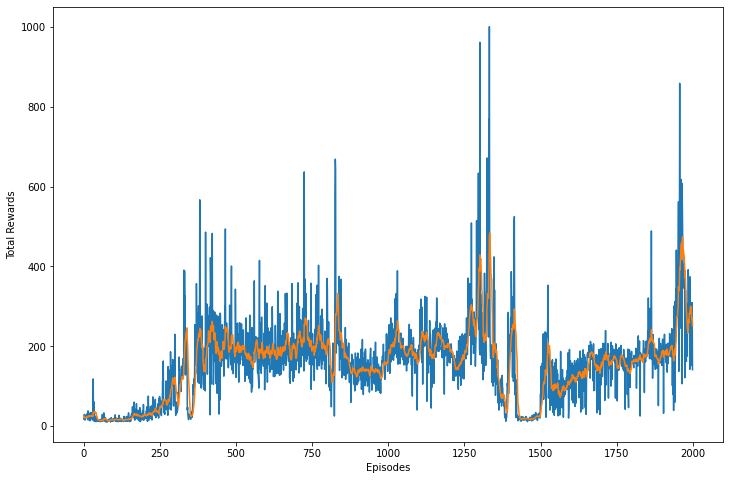

In [0]:
#Running Reinforce Algorithm for Environment 1: InvertedPendulumMuJoCoEnv-v0

total_rewards_inverted_pendulum_actor_critic=ImplementActorCritic(env1,episodes,steps,gamma)
plot(total_rewards_inverted_pendulum_actor_critic)

WalkerBase::__init__
options= 
Episode: 0, reward: -405.30224725853384
Episode: 1, reward: -268.5271771588735
Episode: 2, reward: -300.6883993677072
Episode: 3, reward: -317.73183218282446
Episode: 4, reward: -315.52159419465136
Episode: 5, reward: -305.99295082017295
Episode: 6, reward: -286.38230454075835
Episode: 7, reward: -383.85802562340643
Episode: 8, reward: -292.1549032165296
Episode: 9, reward: -298.16435450754597
Episode: 10, reward: -298.70887011690985
Episode: 11, reward: -319.6838170318169
Episode: 12, reward: -301.1756125382729
Episode: 13, reward: -313.43947915160004
Episode: 14, reward: -334.26848906628834
Episode: 15, reward: -325.9754529937247
Episode: 16, reward: -329.4962983168455
Episode: 17, reward: -314.09942754839557
Episode: 18, reward: -315.63515185705955
Episode: 19, reward: -305.8312606637623
Episode: 20, reward: -373.18621928902706
Episode: 21, reward: -325.65419648472624
Episode: 22, reward: -333.6851271896503
Episode: 23, reward: -347.06022657491087
Epis

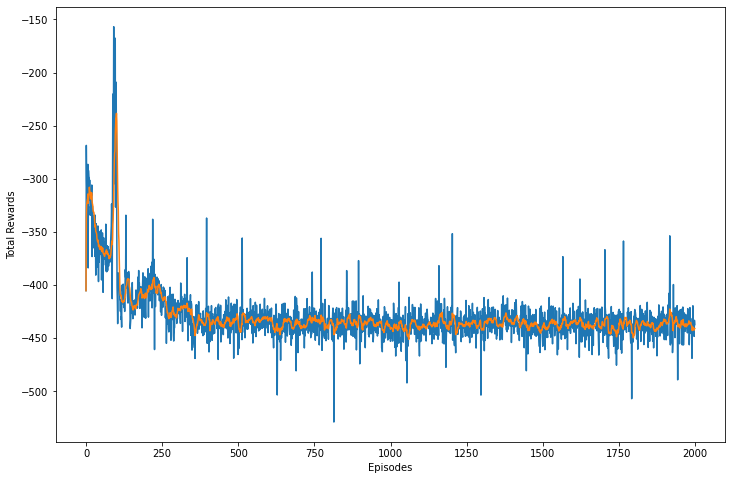

In [0]:
#Running Reinforce Algorithm for Environment 2: HalfCheetahMuJoCoEnv-v0

total_rewards_halfcheetah_actor_critic=ImplementActorCritic(env2,episodes,steps,gamma)
plot(total_rewards_halfcheetah_actor_critic)

# Policy Evaluation

#### Reinforce Algorithm

In [0]:
#Policy evaluation for Environment 1: InvertedPendulumMuJoCoEnv-v0
episode_count=10

cumulative_rewards_inverted_pendulum_reinforce=ImplementReinforce(env1,episode_count,steps,gamma)
policy_eval_reinforce_inverted_pendulum=np.sum(cumulative_rewards_inverted_pendulum_reinforce)/10
print("Policy evaluation for reinforce for Inverted Pendulum : ", policy_eval_reinforce_inverted_pendulum)

options= 
Episode: 0, reward: 22.0
Episode: 1, reward: 25.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode: 2, reward: 85.0
Episode: 3, reward: 25.0
Episode: 4, reward: 27.0
Episode: 5, reward: 31.0
Episode: 6, reward: 18.0
Episode: 7, reward: 16.0
Episode: 8, reward: 28.0
Episode: 9, reward: 18.0
Policy evaluation for reinforce for Inverted Pendulum :  29.5


In [0]:
#Policy evaluation for Environment 2: HalfCheetahMuJoCoEnv-v0
episode_count=10

cumulative_rewards_half_cheetah_reinforce=ImplementReinforce(env2,episode_count,steps,gamma)
policy_eval_reinforce_half_cheetah=np.sum(cumulative_rewards_half_cheetah_reinforce)/10
print("Policy evaluation for reinforce for Half Cheetah : ", policy_eval_reinforce_half_cheetah)

WalkerBase::__init__
options= 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode: 0, reward: -450.5603609846115
Episode: 1, reward: -282.13813292464687
Episode: 2, reward: -344.57433342980966
Episode: 3, reward: -239.8589620213859
Episode: 4, reward: -297.4520981942266
Episode: 5, reward: -301.23653973948336
Episode: 6, reward: -354.53536767642623
Episode: 7, reward: -270.95127240613755
Episode: 8, reward: -244.04506388642056
Episode: 9, reward: -333.0516442338334
Policy evaluation for reinforce for Half Cheetah :  -311.8403775496982


#### Actor-Critic Algorithm

In [0]:
#Policy evaluation for Environment 1: InvertedPendulumMuJoCoEnv-v0
episode_count=10

cumulative_rewards_inverted_pendulum_actor_critic=ImplementActorCritic(env1,episode_count,steps,gamma)
policy_eval_actor_critic_inverted_pendulum=np.sum(cumulative_rewards_inverted_pendulum_actor_critic)/10
print("Policy evaluation for Actor-Critic for Inverted Pendulum : ", policy_eval_actor_critic_inverted_pendulum)

options= 
Episode: 0, reward: 20.0
Episode: 1, reward: 149.0
Episode: 2, reward: 21.0
Episode: 3, reward: 45.0
Episode: 4, reward: 32.0
Episode: 5, reward: 20.0
Episode: 6, reward: 45.0
Episode: 7, reward: 26.0
Episode: 8, reward: 26.0
Episode: 9, reward: 31.0
Policy evaluation for Actor-Critic for Inverted Pendulum :  41.5


In [0]:
#Policy evaluation for Environment 2: HalfCheetahMuJoCoEnv-v0
episode_count=10

cumulative_rewards_half_cheetah_actor_critic=ImplementActorCritic(env2,episode_count,steps,gamma)
policy_eval_actor_critic_half_cheetah=np.sum(cumulative_rewards_half_cheetah_actor_critic)/10
print("Policy evaluation for Actor-Critic for Half Cheetah : ", policy_eval_actor_critic_half_cheetah)

WalkerBase::__init__
options= 
Episode: 0, reward: -165.6952982764707
Episode: 1, reward: -239.45458339920847
Episode: 2, reward: -287.52292452705194
Episode: 3, reward: -287.1644551935182
Episode: 4, reward: -301.21293406001087
Episode: 5, reward: -274.8326699054117
Episode: 6, reward: -254.24894656687442
Episode: 7, reward: -273.44307582508986
Episode: 8, reward: -288.22616103549245
Episode: 9, reward: -265.02373827676485
Policy evaluation for Actor-Critic for Half Cheetah :  -263.6824787065894
